In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle
import functions

In [2]:
# Directory creation with Pickle

# Designate path, check if exists, and create:
directory_path = '../transformers'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    
directory_path = '../scalers'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

directory_path = '../models'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

## Defensive Stats

### Identifying possible X candidates against y (super bowl appearance and super bowl win)

In [3]:
defensive_df = pd.read_csv('../data/cleaned/2017-2021_aggregated_team_defensive_stats_with_sb.csv')
defensive_df

,year,stat_type,team,forced_fumbles,fumble_recoveries,fumble_recovery_td,reception_fumble,rush_fumble,pass_attempt,pass_cmp,...,4th_att,4th_md,rec_1st_all,rec_1st%_all,rush_1st_all,rush_1st%_all,total_plays,year_team,sb_winner,sb_appearance
0,2018,defense,49ers,11,5,0,4,6,542,344,...,17,10,195,56.7,104,23.4,1023,2018_49ers,0,0
1,2018,defense,Bears,18,9,1,4,5,615,377,...,28,16,186,49.3,67,19.8,1004,2018_Bears,0,0
2,2018,defense,Bengals,10,6,2,3,3,584,389,...,17,11,221,56.8,125,26.8,1084,2018_Bengals,0,0
3,2018,defense,Bills,21,11,0,4,10,492,313,...,11,6,157,50.2,111,25.2,968,2018_Bills,0,0
4,2018,defense,Broncos,13,10,0,3,6,549,353,...,11,6,197,55.8,85,19.8,1022,2018_Broncos,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2021,defense,Seahawks,9,7,0,1,5,658,443,...,31,13,240,54.2,124,24.4,1201,2021_Seahawks,0,0
156,2021,defense,Steelers,18,9,0,7,7,563,355,...,24,13,186,52.4,144,28.9,1116,2021_Steelers,0,0
157,2021,defense,Texans,16,8,0,4,10,546,363,...,19,11,218,60.1,135,25.8,1101,2021_Texans,0,0
158,2021,defense,Titans,13,6,1,7,4,628,395,...,24,14,204,51.6,90,24.5,1039,2021_Titans,0,0


In [4]:
defensive_df['sb_winner'] = defensive_df['sb_winner'].astype(bool)
defensive_df['sb_appearance'] = defensive_df['sb_appearance'].astype(bool)

In [5]:
# Splitting dataframe to check numerical columns for statistical difference between means to identify 
# potential X candidates for logistic regression

defensive_sb_app = defensive_df.loc[defensive_df['sb_appearance'] == True].select_dtypes(np.number)
defensive_nosb_app = defensive_df.loc[defensive_df['sb_appearance'] == False].select_dtypes(np.number)
display(defensive_sb_app.shape)
display(defensive_nosb_app.shape)

(10, 48)

(150, 48)

In [6]:
functions.normaltest_mult_col(defensive_nosb_app)

year: 108.9918957048916 2.1513474772124718e-24
fumble_recovery_td: 49.14683315337764 2.1276528978139807e-11
reception_fumble: 11.928844385146638 0.0025685282934255435
rush_td: 15.8233382139905 0.00036644243823465156
rush_20+: 20.28046970621588 3.9459534542918395e-05
rush_40+: 20.342820777004306 3.8248340337508586e-05
int_td: 15.927186414814166 0.0003479007891770097
int_yds: 8.4320904425152 0.014756889488830064
SFTY: 40.758633111181034 1.4105070946861231e-09
/n


In [7]:
functions.normaltest_mult_col(defensive_sb_app)

fumble_recovery_td: 8.067546329668009 0.017707390842496836
pass_td: 8.170506485345058 0.0168188795186067
opp_qb_rate: 21.53932839303407 2.1027820810452017e-05
pass_1st: 8.835285673182934 0.012062632395416202
pass_1st%: 8.899378557738487 0.01168219631175743
rush_20+: 0.0009657092936791859 0.9995172619087048
int_yds: 9.689639955745971 0.007869033927709705
3rd_md: 12.081782682587942 0.0023794370775936527
rec_1st_all: 8.835285673182934 0.012062632395416202
/n


/Users/alexferrer/Desktop/bootcamp/Week_5/sbw_f/venv_sbw/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
# identifying potential X candidates for appearing in a super bowl (win or lose)
functions.ttest_ind_2(defensive_df, 'sb_appearance', True, False, 9)

year 0.0 1.0
rush_att -2.6545076268991243 0.008755154814211187
rush_td -2.457023444957893 0.015090868797000936
rec_yds -0.011103310641426846 0.9911550292367656
total_sack -3.138259871223912 0.002028155161349757


In [9]:
# Creating list of columns as X candidates to use for logistic regression model. 
potential_x_candidates_app_with_y = ['rush_att', 'rush_td', 'rec_yds', 'total_sack', 'sb_appearance']

In [10]:
defensive_df_appearance = defensive_df[potential_x_candidates_app_with_y]

### Logistic Regression for Defense appearing in a superbowl

In [11]:
# Split into X and y
X = defensive_df_appearance.drop(columns='sb_appearance')
y = defensive_df_appearance['sb_appearance']

In [12]:
# train test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [13]:
# no categorical data in X. Only numerical. 
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [14]:
# No categorical column encoding required. 

In [15]:
from sklearn.preprocessing import PowerTransformer

trans = PowerTransformer()

trans.fit(X_train_num)

X_train_transf = trans.transform(X_train_num)
X_test_transf = trans.transform(X_test_num)

X_train_transf_df = pd.DataFrame(X_train_transf, columns=X_train_num.columns, index=X_train_num.index)
X_test_transf_df = pd.DataFrame(X_test_transf, columns=X_train_num.columns, index=X_test_num.index)

X_train_transf_df.head()

,rush_att,rush_td,rec_yds,total_sack
4,0.029115,-0.779503,0.554836,-0.447503
133,0.211207,-0.268785,-0.746155,0.931956
136,1.763053,1.512957,-0.057098,-0.734531
43,-0.482903,-0.033901,-0.335423,-1.524182
124,-1.012615,-0.033901,-0.996659,-1.423271


In [16]:
# saving to directory:
path = "../transformers/"
filename = "powertransformer_1.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(trans, file)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_transf_df)

X_train_scaled =  scaler.transform(X_train_transf_df)
X_test_scaled = scaler.transform(X_test_transf_df)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_transf_df.columns, index=X_train_transf_df.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train_transf_df.columns, index=X_test_transf_df.index)

X_train_scaled_df.head()

,rush_att,rush_td,rec_yds,total_sack
4,0.538273,0.365220,0.612993,0.445479
133,0.579092,0.455195,0.340702,0.749306
136,0.926966,0.769088,0.484918,0.382260
43,0.423495,0.496575,0.426666,0.208338
124,0.304750,0.496575,0.288273,0.230564


In [18]:
# saving to directory:
path = "../scalers/"
filename = "MinMaxScaler_1.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(scaler, file)

####  Training Logistic Regression Models for Super Bowl Appearance

In [19]:
# Training model with saga as solver. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='auto')

classification.fit(X_train_scaled_df, y_train)

y_test_pred = classification.predict(X_test_scaled_df)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_test_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_pred, zero_division=0)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_test_pred)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_test_pred)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_test_pred)))

The accuracy in the TEST set is: 0.96
The precision in the TEST set is: 0.00
The recall in the TEST set is: 0.00
The F1 in the TEST set is: 0.00
The Kappa in the TEST set is: 0.00


In [20]:
# saving to directory:
path = "../models/"
filename = "classification_logistic_regression_1_saga.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(classification, file)

In [21]:
# Training model wtih lbfgs as solver to see if there is any difference between scores. 
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='auto')

classification.fit(X_train_scaled_df, y_train)

y_pred_test = classification.predict(X_test_scaled_df)

from sklearn.metrics import accuracy_score

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test,zero_division=0)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.96
The precision in the TEST set is: 0.00
The recall in the TEST set is: 0.00
The F1 in the TEST set is: 0.00
The Kappa in the TEST set is: 0.00


In [22]:
# saving to directory:
path = "../models/"
filename = "classification_logistic_regression_1_lbfgs.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(classification, file)

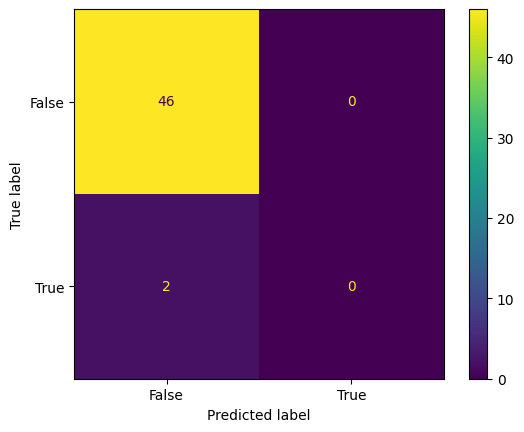

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()
plt.show()

sb_appearance
False    46
True      2
Name: count, dtype: int64

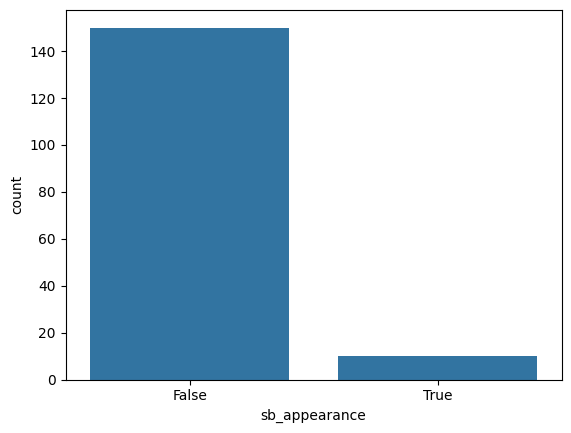

In [24]:
# Looking at dataset imbalance. 
sns.countplot(data=defensive_df_appearance, x='sb_appearance')
len(defensive_df_appearance.loc[defensive_df_appearance['sb_appearance'] == True])
# Based on True values only seen in 6% of dataset, oversampling of true rows required. 
y_test.value_counts()

#### Addressing imbalance of data for superbowl appearances and retraining logistic regression model

In [25]:
# Using SMOTE method to balance TRUE and FALSE values in sb_appearance column
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100,k_neighbors=5)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_scaled_df, y_train)

In [26]:
print(len(X_train_scaled_df), len(X_train_SMOTE))
y_train_SMOTE.value_counts()

112 208


sb_appearance
False    104
True     104
Name: count, dtype: int64

In [27]:
# Re-running the logistic regression model with OVER sampled df for TRUE values. 
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test_SMOTE = lr.predict(X_test_scaled_df)

In [28]:
# saving to directory:
path = "../models/"
filename = "classification_logistic_regression_1_oversampling.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(lr, file)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test_SMOTE)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test_SMOTE,zero_division=0)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test_SMOTE)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test_SMOTE)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test_SMOTE)))

The accuracy in the TEST set is: 0.65
The precision in the TEST set is: 0.11
The recall in the TEST set is: 1.00
The F1 in the TEST set is: 0.19
The Kappa in the TEST set is: 0.12


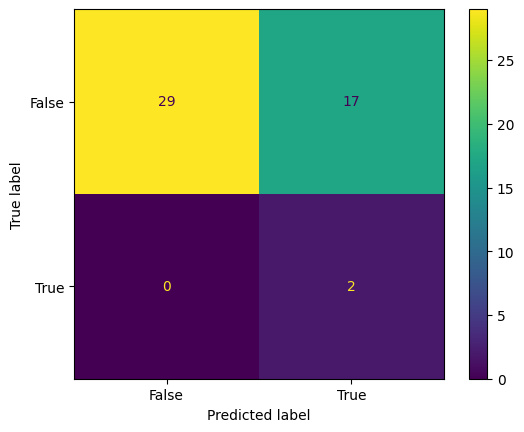

In [30]:
cm_test = confusion_matrix(y_test, y_pred_test_SMOTE)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()
plt.show()

#### Training Logistic Regression Models for Super Bowl Win

In [31]:
defensive_sb_win = defensive_df.loc[defensive_df['sb_winner'] == 1].select_dtypes(np.number)

In [32]:
# identifying potential X candidates for winning in a super bowl
# using significance level as 0.1 due to small size of dataset
functions.ttest_ind_2(defensive_df, 'sb_winner', True, False, 9, 0.1)

year 0.0 1.0
reception_fumble 2.0312898823041303 0.043901652337641026
pass_attempt 2.1110632241713967 0.03634081820893282
rush_att -2.7936812739817616 0.005856148534420825
rush_td -1.998733864621806 0.04735223696124111
3rd_md -2.01380378579999 0.04572736716254495


In [33]:
potential_x_candidates_win_with_y = ['rush_att', 'reception_fumble', 'pass_attempt', '3rd_md', 'sb_winner']

In [34]:
defensive_df_winner = defensive_df[potential_x_candidates_win_with_y]

### Logistic Regression for Defense winning in a superbowl

In [35]:
# Split into X and y
X = defensive_df_winner.drop(columns='sb_winner')
y = defensive_df_winner['sb_winner']

In [36]:
# train test data split

# checking y_split value counts to ensure there is enough data for the model to be trained on regarding super bowl winners and their corresponding statistics

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
y_test.value_counts(), y_train.value_counts()

(sb_winner
 False    47
 True      1
 Name: count, dtype: int64,
 sb_winner
 False    108
 True       4
 Name: count, dtype: int64)

In [37]:
# no categorical data in X. Only numerical. 
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [38]:
# No categorical column encoding required. 

In [39]:
from sklearn.preprocessing import PowerTransformer

trans = PowerTransformer()

trans.fit(X_train_num)

X_train_transf = trans.transform(X_train_num)
X_test_transf = trans.transform(X_test_num)

X_train_transf_df = pd.DataFrame(X_train_transf, columns=X_train_num.columns, index=X_train_num.index)
X_test_transf_df = pd.DataFrame(X_test_transf, columns=X_train_num.columns, index=X_test_num.index)

X_train_transf_df.head()

,rush_att,reception_fumble,pass_attempt,3rd_md
4,0.029115,-0.251701,-0.266864,0.045085
133,0.211207,0.195749,0.379368,0.396358
136,1.763053,0.604037,-0.020996,2.106978
43,-0.482903,-0.251701,0.217110,-1.364456
124,-1.012615,0.604037,-1.627727,-0.876853


In [40]:
# saving to directory:
path = "../transformers/"
filename = "powertransformer_2.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(trans, file)

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_transf_df)

X_train_scaled =  scaler.transform(X_train_transf_df)
X_test_scaled = scaler.transform(X_test_transf_df)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_transf_df.columns, index=X_train_transf_df.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train_transf_df.columns, index=X_test_transf_df.index)

X_train_scaled_df.head()

,rush_att,reception_fumble,pass_attempt,3rd_md
4,0.538273,0.392511,0.430389,0.568836
133,0.579092,0.488296,0.566720,0.632851
136,0.926966,0.575697,0.482258,0.944590
43,0.423495,0.392511,0.532490,0.311966
124,0.304750,0.575697,0.143299,0.400825


In [42]:
# saving to directory:
path = "../scalers/"
filename = "MinMaxScaler_2.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(scaler, file)

####  Training Logistic Regression Models for Super Bowl Win

In [43]:
# Training model with saga as solver. 
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='auto')

classification.fit(X_train_scaled_df, y_train)

y_pred_test = classification.predict(X_test_scaled_df)

from sklearn.metrics import accuracy_score

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test,zero_division=0)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.98
The precision in the TEST set is: 0.00
The recall in the TEST set is: 0.00
The F1 in the TEST set is: 0.00
The Kappa in the TEST set is: 0.00


In [44]:
# saving to directory:
path = "../models/"
filename = "classification_logistic_regression_2_saga.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(classification, file)

In [45]:
# Training model wtih lbfgs as solver to see if there is any difference between scores. 

classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='auto')

classification.fit(X_train_scaled_df, y_train)

y_pred_test = classification.predict(X_test_scaled_df)

from sklearn.metrics import accuracy_score

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, zero_division=0)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.98
The precision in the TEST set is: 0.00
The recall in the TEST set is: 0.00
The F1 in the TEST set is: 0.00
The Kappa in the TEST set is: 0.00


In [46]:
# saving to directory:
path = "../models/"
filename = "classification_logistic_regression_2_lbfgs.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(classification, file)

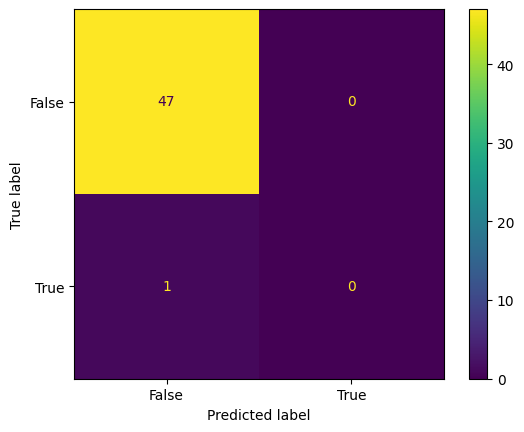

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()
plt.show()

(sb_winner
 False    47
 True      1
 Name: count, dtype: int64,
 sb_winner
 False    108
 True       4
 Name: count, dtype: int64)

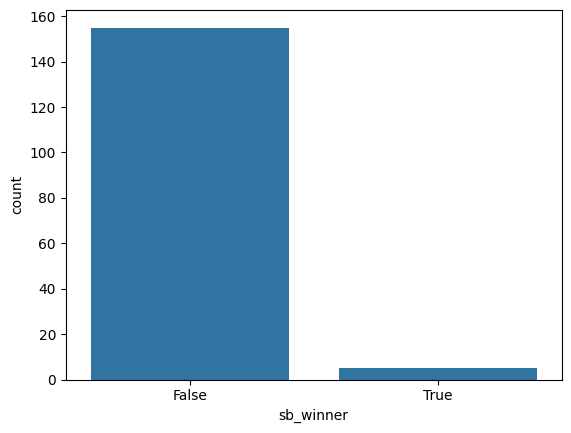

In [48]:
# Looking at dataset imbalance. 
sns.countplot(data=defensive_df_winner, x='sb_winner')
len(defensive_df_appearance.loc[defensive_df_winner['sb_winner'] == True])
# Based on True values only seen in 6% of dataset, oversampling of true rows required. 
y_test.value_counts(), y_train.value_counts()

#### Addressing imbalance of data for superbowl appearances and retraining logistic regression model

In [49]:
# Using SMOTE method to balance TRUE and FALSE values in sb_appearance column

# Using k_neighbors = 2 here due to severely low sample size. 
# What this likely means, the model will likely be less accurate at predicting real scenarios of super bowl wins, unless more data from 
# past years is fed into the model. 

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=9, k_neighbors=3)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_scaled_df, y_train)

In [50]:
print(len(X_train_scaled_df), len(X_train_SMOTE))
y_train_SMOTE.value_counts()

112 216


sb_winner
False    108
True     108
Name: count, dtype: int64

In [51]:
# Re-running the logistic regression model with OVER sampled df for TRUE values. 
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test_SMOTE = lr.predict(X_test_scaled_df)

In [52]:
# saving to directory:
path = "../models/"
filename = "classification_logistic_regression_2_oversampling.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(lr, file)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test_SMOTE)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test_SMOTE,zero_division=0)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test_SMOTE)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test_SMOTE)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test_SMOTE)))

The accuracy in the TEST set is: 0.85
The precision in the TEST set is: 0.12
The recall in the TEST set is: 1.00
The F1 in the TEST set is: 0.22
The Kappa in the TEST set is: 0.19


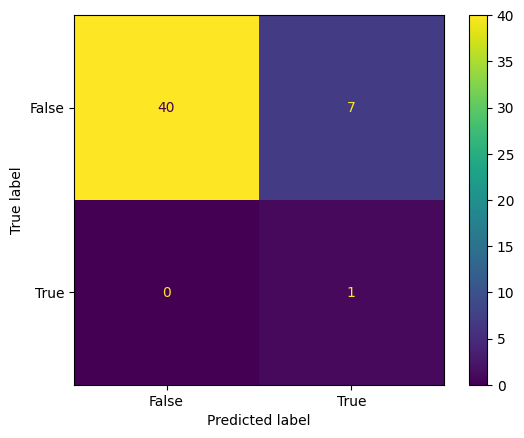

In [54]:
cm_test = confusion_matrix(y_test, y_pred_test_SMOTE)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()
plt.show()

### Conclusion for predicting Super Bowl wins and appearances
In conclusion of predicting super bowl wins and appearances for NFL teams based on their regular season defensive statistics, an overall kappa score for both models was quite low, and there had to be significant oversampling performed in order to improve overall accuracy and kappa score for the models. 

#### Super Bowl Winner Prediction
Due to the 1 winner per year in the 5 years dataset, this makes the overall prediciton accuracy difficult to improve without additional years of data. 
However, what can be seen is the main variables for helping predict an NFL's teams likelihood to win a super bowl from defensive statistics are: 

- rush_att: Number of attempts from opposing teams who try to run the ball against the team's defence.
- reception_fumble: Number of times the defence has caused a receiver to fumble (lose possession of) the ball after catching a pass. The assumption here being that the higher this number of reception fumbles, the higher the rate of turnovers from this team's defence, and then the lower the likelihood of this defence conceding points and the higher the chance of this defence winning the superbowl. 
- pass_attempt: Number of pass attempts against the team's defence. 
- 3rd_md: Number of 3rd downs converted against the team's defence. The assumption here is that the lower this statistic, the better the team's defence, and therefore the higher likelihood this team win's a super bowl

#### Super Bowl Appearance Prediction
Being able to play in a super bowl is the secondary goal of every NFL team, after of course winning said Super Bowl. As this dataset contained more super bowl appearances than super bowl winners from the same time frame, naturally, then it made sense the model was better able to come up with accurate predictions after oversampling with SMOTE and 3 k_nearest neighbors.

The main determinants for being able to predict a team's super bowl appearance included: 

- rush_att: the number of rushing attempts that defence faced throughout the regular season. 
- rush_td: the number of rushing touchdowns that defence conceded throughou the regular season. 
- rec_yds: the number of reception yards that defence conceded throughout the season. 
- total_sack: the number of sacks recorded by the defence throughout the regular season.
The assumptions being that all of these variables, apart from sacks which would be the opposite, would be that the lower the number for the defence, the higher the likelihood that the defence will be playing in the superbowl. 

## Offensive Stats

### Identifying possible X candidates against y (super bowl appearance and super bowl win)

In [55]:
# import data
offensive_df = pd.read_csv('../data/cleaned/2017-2021_aggregated_team_offensive_stats_with_sb.csv')

In [56]:
offensive_df.head()

,year,stat_type,Team,rush_att,rush_yds,avg_rush,rush_td,rush_20+,rush_40+,rush_Lng,...,rec_fumbles,3rd_att,3rd_md,4th_att,4th_md,total_plays,year_team,sb_winner,sb_appearance,passtd_rushtd_ratio
0,2017,offense,Chiefs,405,1903,4.7,12,15,4,70,...,2.0,199.0,78.0,10.0,3.0,985.0,2017_Chiefs,0,0,2.166667
1,2017,offense,Eagles,473,2115,4.5,9,19,3,71,...,2.0,230.0,96.0,26.0,17.0,1073.0,2017_Eagles,0,0,4.222222
2,2017,offense,Dolphins,360,1388,3.9,4,10,4,69,...,10.0,202.0,64.0,24.0,7.0,995.0,2017_Dolphins,0,0,6.000000
3,2017,offense,Cowboys,480,2170,4.5,18,12,2,70,...,2.0,203.0,87.0,19.0,10.0,1005.0,2017_Cowboys,0,0,1.222222
4,2017,offense,Colts,451,1661,3.7,11,8,0,35,...,4.0,228.0,87.0,17.0,8.0,994.0,2017_Colts,0,0,1.181818


<Axes: xlabel='passtd_rushtd_ratio', ylabel='Count'>

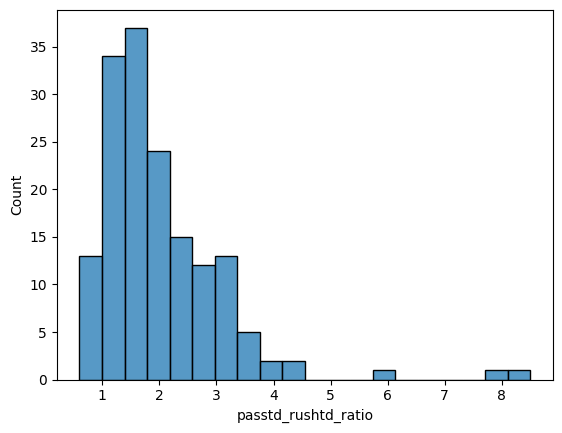

In [57]:
sns.histplot(data=offensive_df, x='passtd_rushtd_ratio')


In [58]:
# Splitting dataframe to check numerical columns for statistical difference between means to identify 
# potential X candidates for logistic regression

offensive_sb_app = offensive_df.loc[offensive_df['sb_appearance'] == True].select_dtypes(np.number)
offensive_nosb_app = offensive_df.loc[offensive_df['sb_appearance'] == False].select_dtypes(np.number)
display(offensive_sb_app.shape)
display(offensive_nosb_app.shape)

(10, 35)

(150, 35)

In [59]:
functions.normaltest_mult_col(offensive_nosb_app)

year: 108.9918957048916 2.1513474772124718e-24
rush_yds: 29.24461622368508 4.462849838056799e-07
rush_20+: 26.35075829355072 1.8967301144878412e-06
rush_40+: 11.155104053160274 0.0037818119718250214
rush_1st: 16.170213197330575 0.0003080937005582501
rush_fumbles: 14.781977693721966 0.000616785745209976
rec_td: 8.533704603524306 0.014025862926048255
2pt: 35.6006591881743 1.8595809187998035e-08
int: 14.533400416680212 0.0006984128123345061
3rd_md: 0.024876156005751306 0.9876389551769942
passtd_rushtd_ratio: 108.89425102883408 2.2589875302509416e-24
/n


In [60]:
functions.normaltest_mult_col(offensive_sb_app)

tot_td: 0.012662540640318288 0.9936887299404951
4th_att: 17.321796875610385 0.0001732286018434863
sb_winner: 13.263400004957136 0.0013179207120628368
/n


/Users/alexferrer/Desktop/bootcamp/Week_5/sbw_f/venv_sbw/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/alexferrer/Desktop/bootcamp/Week_5/sbw_f/venv_sbw/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1606: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/Users/alexferrer/Desktop/bootcamp/Week_5/sbw_f/venv_sbw/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1808: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


In [61]:
# identifying potential X candidates for appearing in a super bowl (win or lose)
# using t-test to measure significant statistical differences
functions.ttest_ind_2(offensive_df, 'sb_appearance', True, False, 9)

year 0.0 1.0
rush_40+ -2.415240393532334 0.01686626567062536
pass_att 3.1848506610975695 0.0017450412472373486
pass_cmp 3.414275062503485 0.0008127192891547928
pass_yds 3.6587648916889517 0.0003449055107483282
sck -3.138259871223912 0.002028155161349757
SckY -3.1381631531591188 0.0020287847935228894
pass_20+ 3.6011053249700287 0.0004238286047441162
pass_40+ 0.012001084096256156 0.9904398902179359
pass_rec_1st 3.85401086104693 0.0001686541572044451
total_plays 2.541760270281386 0.011992243647983222
sb_winner 12.170661444638085 1.8391416092073175e-24
sb_appearance inf 0.0


/Users/alexferrer/Desktop/bootcamp/Week_5/sbw_f/venv_sbw/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [62]:
# Creating list of columns as X candidates to use for logistic regression model along with y. 
selected_columns_off=[
'rush_40+', 'pass_att', 'pass_cmp', 'pass_yds',
'sck', 'SckY', 'pass_20+', 'pass_40+', 'pass_rec_1st', 'total_plays','sb_appearance']

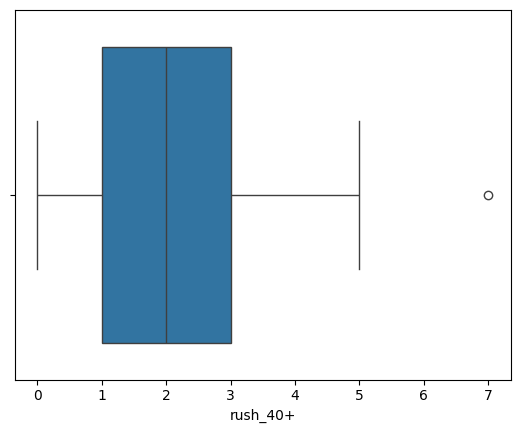

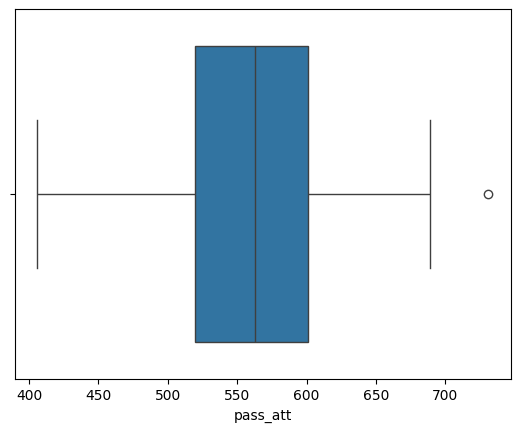

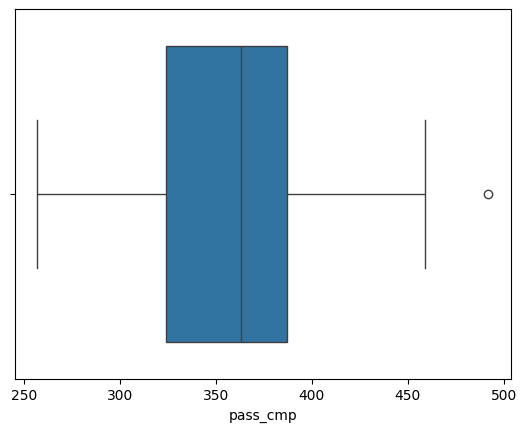

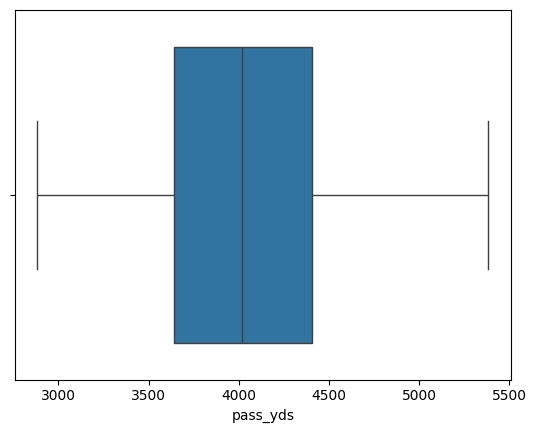

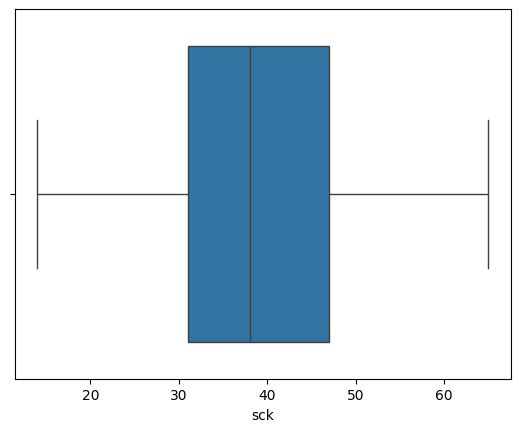

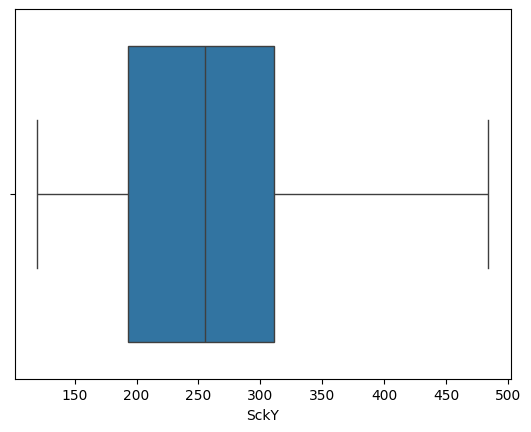

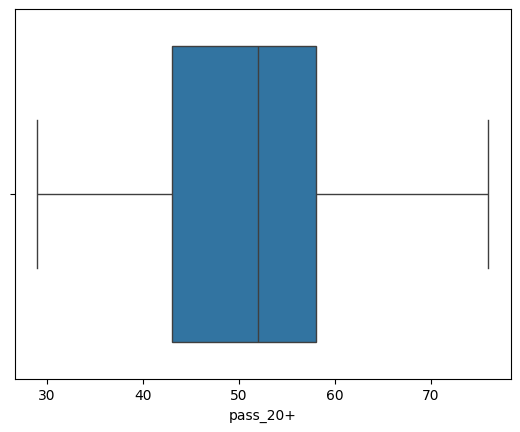

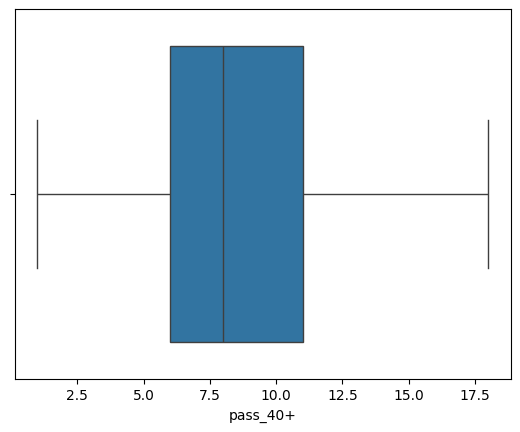

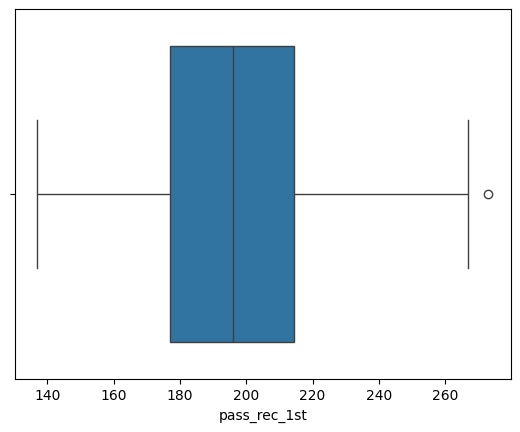

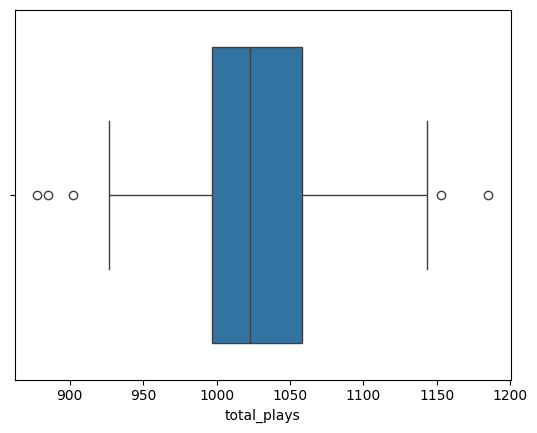

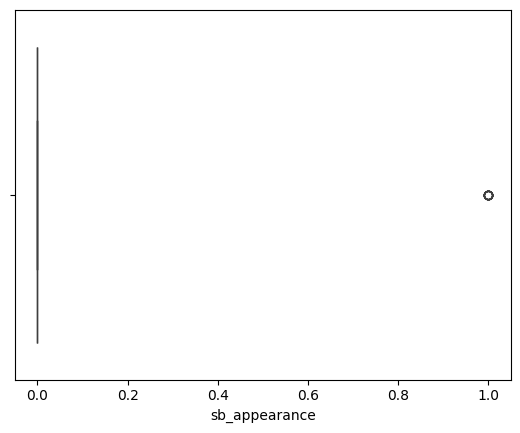

In [63]:
# visual check, some outliers in some of the selected columns.
offensive_df_plots = offensive_df.select_dtypes(np.number)

for col in selected_columns_off:
    sns.boxplot(data=offensive_df_plots, x=col)
    plt.show()

In [64]:
# call function
functions.col_skewness(offensive_df, selected_columns_off)

rush_40+ skewness, positive skewed:  0.7394412748342206
pass_att skewness, close to symmetrical:  -0.025679182487384135
pass_cmp skewness, close to symmetrical:  0.10904545663522111
pass_yds skewness, close to symmetrical:  0.22426582697510883
sck skewness, close to symmetrical:  0.08614313376836936
SckY skewness, close to symmetrical:  0.2505208265722574
pass_20+ skewness, close to symmetrical:  0.1861731140278374
pass_40+ skewness, close to symmetrical:  0.4891680769174413
pass_rec_1st skewness, close to symmetrical:  0.26158263126346376
total_plays skewness, close to symmetrical:  0.055151197835882335
sb_appearance skewness, positive skewed:  3.649084100602987


### Logistic Regression for Offense appearing in a superbowl

In [65]:
offensive_df_appearance = offensive_df[selected_columns_off]

In [66]:
# Split into X and y
X_off = offensive_df_appearance.drop(columns='sb_appearance')
y_off = offensive_df_appearance['sb_appearance']

In [67]:
y_off.value_counts()

sb_appearance
0    150
1     10
Name: count, dtype: int64

In [68]:
# train test data split
from sklearn.model_selection import train_test_split
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_off, y_off, test_size=0.3, random_state=70)

In [69]:
# no categorical data in X. Only numerical. 
X_train_num_o = X_train_o.select_dtypes(np.number)
X_test_num_o = X_test_o.select_dtypes(np.number)

In [70]:
# No categorical column encoding required. 

In [71]:
from sklearn.preprocessing import PowerTransformer

trans_o = PowerTransformer()

trans_o.fit(X_train_num_o)

X_train_transf_o = trans_o.transform(X_train_num_o)
X_test_transf_o = trans_o.transform(X_test_num_o)

X_train_transf_df_o = pd.DataFrame(X_train_transf_o, columns=X_train_num_o.columns, index=X_train_num_o.index)
X_test_transf_df_o = pd.DataFrame(X_test_transf_o, columns=X_test_num_o.columns, index=X_test_num_o.index)

X_train_transf_df_o.head()

,rush_40+,pass_att,pass_cmp,pass_yds,sck,SckY,pass_20+,pass_40+,pass_rec_1st,total_plays
132,0.370188,-0.693751,-0.860551,-0.779588,1.050166,0.642184,-0.445418,0.096732,-0.611680,0.462139
11,-1.559191,-0.870404,-1.249142,-1.253636,0.274210,0.212608,-1.826370,0.096732,-1.074702,-2.023881
2,1.329992,0.774977,0.370692,-0.438452,-0.395053,0.123600,-1.069826,-1.202671,-0.242845,-0.658066
115,-1.559191,0.000417,0.303092,-0.159113,-0.295195,-0.633338,-1.175923,-1.576988,0.454079,-0.157423
50,-0.362771,-0.835118,-0.292954,-0.526343,-0.395053,-0.896851,-0.548116,0.667333,-0.611680,-0.310264


In [72]:
# saving to directory:
path = "../transformers/"
filename = "powertransformer_3.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(trans_o, file)

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler_o = MinMaxScaler()

scaler_o.fit(X_train_transf_df_o)

X_train_scaled_o =  scaler_o.transform(X_train_transf_df_o)
X_test_scaled_o = scaler_o.transform(X_test_transf_df_o)

X_train_scaled_df_o = pd.DataFrame(X_train_scaled_o, columns=X_train_transf_df_o.columns, index=X_train_transf_df_o.index)
X_test_scaled_df_o = pd.DataFrame(X_test_scaled_o, columns=X_test_transf_df_o.columns, index=X_test_transf_df_o.index)

X_train_scaled_df_o.head()

,rush_40+,pass_att,pass_cmp,pass_yds,sck,SckY,pass_20+,pass_40+,pass_rec_1st,total_plays
132,0.506459,0.392437,0.339692,0.345941,0.724519,0.645711,0.410174,0.566578,0.362151,0.594381
11,0.000000,0.357398,0.256366,0.235274,0.548280,0.537882,0.118771,0.566578,0.260318,0.156459
2,0.758406,0.683757,0.603711,0.425579,0.396273,0.515540,0.278414,0.324197,0.443270,0.397052
115,0.000000,0.530124,0.589215,0.490791,0.418953,0.325540,0.256025,0.254375,0.596545,0.485242
50,0.314059,0.364397,0.461404,0.405061,0.396273,0.259395,0.388503,0.673014,0.362151,0.458319


In [74]:
# saving to directory:
path = "../scalers/"
filename = "MinMaxScaler_3.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(scaler_o, file)

####  Training Logistic Regression Models for Super Bowl Appearance (offensive stats)

In [75]:
# Training model wtih lbfgs as solver
from sklearn.linear_model import LogisticRegression

classification_o2 = LogisticRegression(max_iter=1000, penalty='l2',random_state=0, solver='lbfgs',
                  multi_class='auto')

classification_o2.fit(X_train_scaled_df_o, y_train_o)

y_test_pred_o = classification_o2.predict(X_test_scaled_df_o)

from sklearn.metrics import accuracy_score

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test_o,y_test_pred_o)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test_o,y_test_pred_o,zero_division=0)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test_o,y_test_pred_o)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test_o,y_test_pred_o)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test_o,y_test_pred_o)))

The accuracy in the TEST set is: 0.96
The precision in the TEST set is: 0.00
The recall in the TEST set is: 0.00
The F1 in the TEST set is: 0.00
The Kappa in the TEST set is: 0.00


In [76]:
# saving to directory:
path = "../models/"
filename = "classification_logistic_regression_3_lbfgs.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(classification_o2, file)

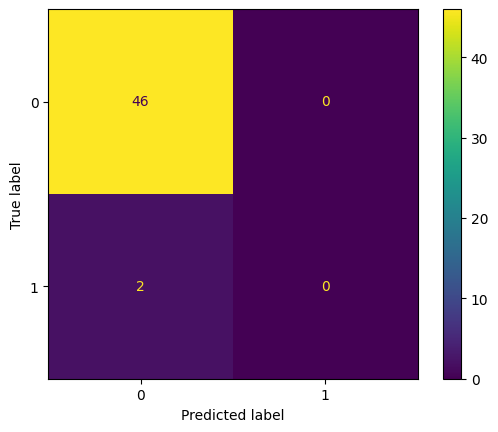

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test_o = confusion_matrix(y_test_o, y_test_pred_o)

disp_o = ConfusionMatrixDisplay(cm_test_o,display_labels=classification_o2.classes_)
disp_o.plot()
plt.show()

sb_appearance
0    46
1     2
Name: count, dtype: int64

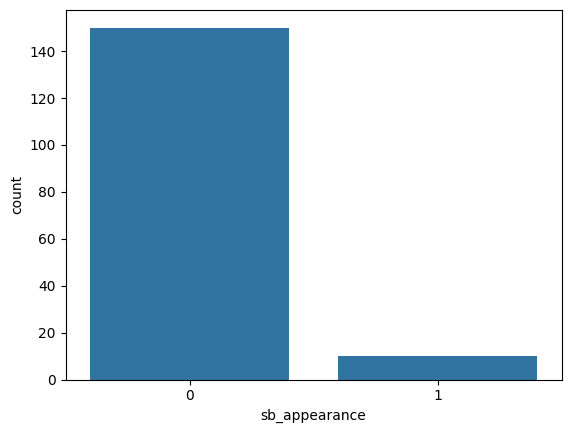

In [79]:
# Looking at dataset imbalance. 
sns.countplot(data=offensive_df_appearance, x='sb_appearance')
len(offensive_df_appearance.loc[offensive_df_appearance['sb_appearance'] == True])
# Based on True values only seen in 4.16% of dataset, oversampling of true rows required. 
y_test_o.value_counts()

#### Addressing imbalance of data for superbowl appearances and retraining logistic regression model

In [80]:
# Using SMOTE method to balance TRUE and FALSE values in sb_appearance column
from imblearn.over_sampling import SMOTE

sm_o = SMOTE(random_state=100,k_neighbors=5)

X_train_SMOTE_o, y_train_SMOTE_o = sm_o.fit_resample(X_train_scaled_df_o, y_train_o)

In [81]:
print(len(X_train_scaled_df_o), len(X_train_SMOTE_o))
y_train_SMOTE_o.value_counts()

112 208


sb_appearance
0    104
1    104
Name: count, dtype: int64

In [82]:
# Re-running the logistic regression model with OVER sampled df for TRUE values. 
lr_o = LogisticRegression(max_iter=1000, penalty='l2',random_state=0, solver='lbfgs',
                  multi_class='auto')
lr_o.fit(X_train_SMOTE_o, y_train_SMOTE_o)
y_pred_test_SMOTE_o = lr_o.predict(X_test_scaled_df_o)

In [83]:
# saving to directory:
path = "../models/"
filename = "classification_logistic_regression_3_oversampling.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(lr_o, file)

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test_o,y_pred_test_SMOTE_o)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test_o,y_pred_test_SMOTE_o,zero_division=0)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test_o,y_pred_test_SMOTE_o)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test_o,y_pred_test_SMOTE_o)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test_o,y_pred_test_SMOTE_o)))

The accuracy in the TEST set is: 0.85
The precision in the TEST set is: 0.22
The recall in the TEST set is: 1.00
The F1 in the TEST set is: 0.36
The Kappa in the TEST set is: 0.32


In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_test_o, y_pred_test_SMOTE_o))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        46
           1       0.22      1.00      0.36         2

    accuracy                           0.85        48
   macro avg       0.61      0.92      0.64        48
weighted avg       0.97      0.85      0.89        48



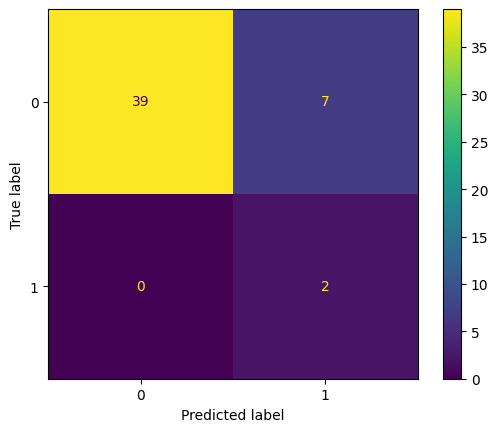

In [86]:
cm_test_o = confusion_matrix(y_test_o, y_pred_test_SMOTE_o)

disp_o = ConfusionMatrixDisplay(cm_test_o,display_labels=lr_o.classes_)
disp_o.plot()
plt.show()

### Logistic Regression for Offense winning in a superbowl

In [110]:
selected_columns_off_w=['rush_40+',
 'pass_att', 'pass_cmp', 'pass_yds', 'sck', 'SckY', 'pass_20+',
 'pass_40+', 'pass_rec_1st', 'total_plays', 'sb_winner']

In [88]:
offensive_df_winner = offensive_df[selected_columns_off_w]

In [89]:
offensive_df_winner['sb_winner'].value_counts()

sb_winner
0    155
1      5
Name: count, dtype: int64

In [90]:
# Split into X and y
X_off = offensive_df_winner.drop(columns='sb_winner')
y_off = offensive_df_winner['sb_winner']

In [91]:
y_off.value_counts()

sb_winner
0    155
1      5
Name: count, dtype: int64

In [92]:
# train test data split
from sklearn.model_selection import train_test_split
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_off, y_off, test_size=0.3, random_state=70)

In [93]:
# no categorical data in X. Only numerical. 
X_train_num_o = X_train_o.select_dtypes(np.number)
X_test_num_o = X_test_o.select_dtypes(np.number)

In [94]:
from sklearn.preprocessing import PowerTransformer

trans_o_w = PowerTransformer()

trans_o_w.fit(X_train_num_o)

X_train_transf_o = trans_o_w.transform(X_train_num_o)
X_test_transf_o = trans_o_w.transform(X_test_num_o)

X_train_transf_df_o = pd.DataFrame(X_train_transf_o, columns=X_train_num_o.columns, index=X_train_num_o.index)
X_test_transf_df_o = pd.DataFrame(X_test_transf_o, columns=X_test_num_o.columns, index=X_test_num_o.index)

X_train_transf_df_o.head()

,rush_40+,pass_att,pass_cmp,pass_yds,sck,SckY,pass_20+,pass_40+,pass_rec_1st,total_plays
132,0.370188,-0.693751,-0.860551,-0.779588,1.050166,0.642184,-0.445418,0.096732,-0.611680,0.462139
11,-1.559191,-0.870404,-1.249142,-1.253636,0.274210,0.212608,-1.826370,0.096732,-1.074702,-2.023881
2,1.329992,0.774977,0.370692,-0.438452,-0.395053,0.123600,-1.069826,-1.202671,-0.242845,-0.658066
115,-1.559191,0.000417,0.303092,-0.159113,-0.295195,-0.633338,-1.175923,-1.576988,0.454079,-0.157423
50,-0.362771,-0.835118,-0.292954,-0.526343,-0.395053,-0.896851,-0.548116,0.667333,-0.611680,-0.310264


In [95]:
# saving to directory:
path = "../transformers/"
filename = "powertransformer_4.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(trans_o_w, file)

In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler_o_w = MinMaxScaler()

scaler_o_w.fit(X_train_transf_df_o)

X_train_scaled_o =  scaler_o_w.transform(X_train_transf_df_o)
X_test_scaled_o = scaler_o_w.transform(X_test_transf_df_o)

X_train_scaled_df_o = pd.DataFrame(X_train_scaled_o, columns=X_train_transf_df_o.columns, index=X_train_transf_df_o.index)
X_test_scaled_df_o = pd.DataFrame(X_test_scaled_o, columns=X_test_transf_df_o.columns, index=X_test_transf_df_o.index)

X_train_scaled_df_o.head()

,rush_40+,pass_att,pass_cmp,pass_yds,sck,SckY,pass_20+,pass_40+,pass_rec_1st,total_plays
132,0.506459,0.392437,0.339692,0.345941,0.724519,0.645711,0.410174,0.566578,0.362151,0.594381
11,0.000000,0.357398,0.256366,0.235274,0.548280,0.537882,0.118771,0.566578,0.260318,0.156459
2,0.758406,0.683757,0.603711,0.425579,0.396273,0.515540,0.278414,0.324197,0.443270,0.397052
115,0.000000,0.530124,0.589215,0.490791,0.418953,0.325540,0.256025,0.254375,0.596545,0.485242
50,0.314059,0.364397,0.461404,0.405061,0.396273,0.259395,0.388503,0.673014,0.362151,0.458319


In [97]:
# saving to directory:
path = "../scalers/"
filename = "MinMaxScaler_4.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(scaler_o_w, file)

####  Training Logistic Regression Models for Super Bowl Win (offensive stats)

In [98]:
# Training model wtih lbfgs as solver 
from sklearn.linear_model import LogisticRegression

classification_o_w = LogisticRegression(max_iter=1000, penalty='l2',random_state=0, solver='lbfgs',
                  multi_class='auto')

classification_o_w.fit(X_train_scaled_df_o, y_train_o)

y_test_pred_o = classification_o_w.predict(X_test_scaled_df_o)

from sklearn.metrics import accuracy_score

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test_o,y_test_pred_o)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test_o,y_test_pred_o,zero_division=0)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test_o,y_test_pred_o)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test_o,y_test_pred_o)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test_o,y_test_pred_o)))

The accuracy in the TEST set is: 0.96
The precision in the TEST set is: 0.00
The recall in the TEST set is: 0.00
The F1 in the TEST set is: 0.00
The Kappa in the TEST set is: 0.00


In [99]:
# saving to directory:
path = "../models/"
filename = "classification_logistic_regression_4_lbfgs.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(classification_o_w, file)

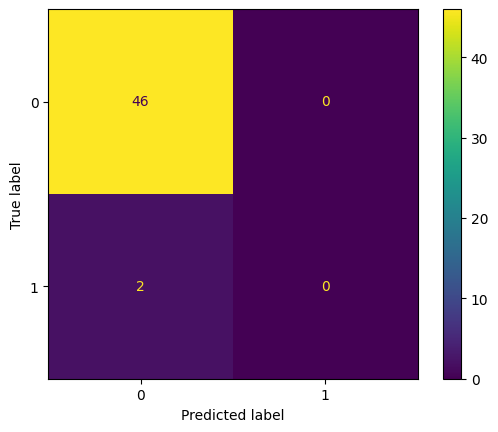

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test_o = confusion_matrix(y_test_o, y_test_pred_o)

disp_o = ConfusionMatrixDisplay(cm_test_o,display_labels=classification_o_w.classes_)
disp_o.plot()
plt.show()

sb_winner
0    46
1     2
Name: count, dtype: int64

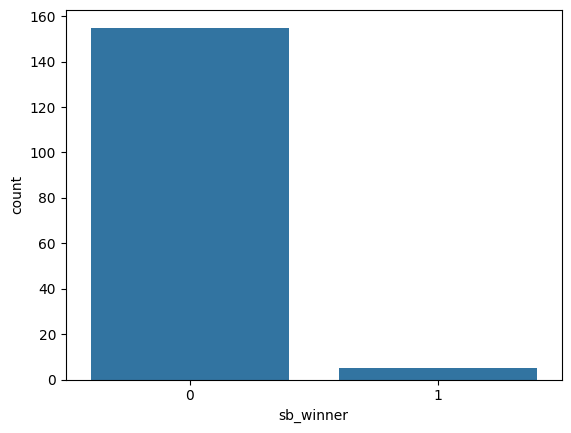

In [102]:
# Looking at dataset imbalance. 
sns.countplot(data=offensive_df_winner, x='sb_winner')
len(offensive_df_winner.loc[offensive_df_winner['sb_winner'] == True])
# Based on True values only seen in 4.16% of dataset, oversampling of true rows required. 
y_test_o.value_counts()

#### Addressing imbalance of data for superbowl appearances and retraining logistic regression model

In [103]:
# Using SMOTE method to balance TRUE and FALSE values in sb_appearance column
from imblearn.over_sampling import SMOTE

sm_o_w = SMOTE(random_state=100,k_neighbors=2) #using 2 k_neighbors as it could not be higher than the sample

X_train_SMOTE_o, y_train_SMOTE_o = sm_o_w.fit_resample(X_train_scaled_df_o, y_train_o)

In [104]:
print(len(X_train_scaled_df_o), len(X_train_SMOTE_o))
y_train_SMOTE_o.value_counts()

112 218


sb_winner
0    109
1    109
Name: count, dtype: int64

In [105]:
# Re-running the logistic regression model with OVER sampled df for TRUE values. 
classification_o_w_s = LogisticRegression(max_iter=1000, penalty='l2',random_state=0, solver='lbfgs',
                  multi_class='auto')
classification_o_w_s.fit(X_train_SMOTE_o, y_train_SMOTE_o)
y_pred_test_SMOTE_o = classification_o_w_s.predict(X_test_scaled_df_o)

In [106]:
# saving to directory:
path = "../models/"
filename = "classification_logistic_regression_4_oversampling.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(classification_o_w_s, file)

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test_o,y_pred_test_SMOTE_o)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test_o,y_pred_test_SMOTE_o,zero_division=0)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test_o,y_pred_test_SMOTE_o)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test_o,y_pred_test_SMOTE_o)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test_o,y_pred_test_SMOTE_o)))

The accuracy in the TEST set is: 0.92
The precision in the TEST set is: 0.25
The recall in the TEST set is: 0.50
The F1 in the TEST set is: 0.33
The Kappa in the TEST set is: 0.29


In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test_o, y_pred_test_SMOTE_o))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.25      0.50      0.33         2

    accuracy                           0.92        48
   macro avg       0.61      0.72      0.64        48
weighted avg       0.95      0.92      0.93        48



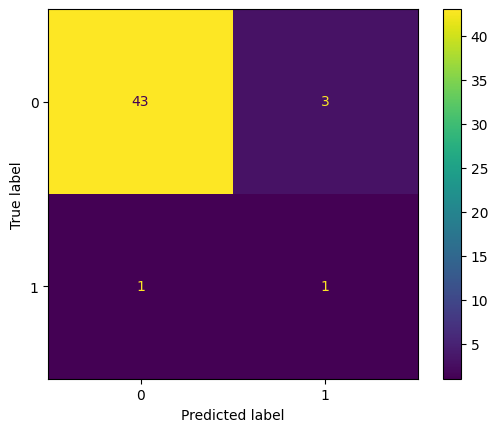

In [109]:
cm_test_o = confusion_matrix(y_test_o, y_pred_test_SMOTE_o)

disp_o = ConfusionMatrixDisplay(cm_test_o,display_labels=lr_o.classes_)
disp_o.plot()
plt.show()

### Conclusion for predicting Super Bowl wins and appearances (WIP)
Due to the very significant data imbalances (only 5 Super Bowl winners and only 10 appearances in the data) there were clear differences in the predictions before and after applying SMOTE to increase the rows of undersampled data.

Generally speaking the models were able to predict with high precision class 0 (not winning, not appearing in the Super Bowl)

#### Super Bowl Winner Prediction
Precision: the model predicted almost all of class 0 instances correctly (model predictions class 0 were true class 0)

- xxx

#### Super Bowl Appearance Prediction
Precision: the model predicted almost all of class 0 instances
- rxxxn.
xxxx